In [1]:
from poincare_maps import *

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from embedding_quality_score import get_quality_metrics

In [3]:
precomputed_models = {
    'ToggleSwitch': 'ToggleSwitch_MFIsym15_klSym_sigma=1.00_gamma=2.00_lr=0.02_lrm=1.00_pca=0_epochs=10000_batchsize=25_connected',
    'MyeloidProgenitors': 'MyeloidProgenitors_MFIsym30_klSym_sigma=2.00_gamma=2.00_lr=0.05_lrm=1.00_pca=0_epochs=10000_batchsize=80_connected',
    'krumsiek11_blobs': 'krumsiek11_blobs_MFIsym30_klSym_sigma=1.00_gamma=2.00_lr=0.10_lrm=1.00_pca=20_epochs=10000_batchsize=160_connected',
    'Olsson': 'Olsson_MFIsym15_klSym_sigma=1.00_gamma=2.00_lr=0.03_lrm=1.00_pca=20_epochs=10000_batchsize=47_connected',
    'Paul': 'Paul_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=0.21_lrm=1.00_pca=20_epochs=10000_batchsize=341_connected',
    'Planaria': 'Planaria_MFIsym15_klSym_sigma=2.00_gamma=2.00_lr=1.25_lrm=1.00_pca=0_epochs=10000_batchsize=2000_connected'
}

In [4]:
def benchmarkQuality(model_name, root_name='root', n_pca=0, k=15):
    fin = f"datasets/{model_name}"
    fout = f"benchmarks/{model_name}"
    col_dict = None
    data, true_labels, col_names = read_data(
        fin, normalize=False, n_pca=n_pca)
    
    adata, iroot, louvain_labels = init_scanpy(
        data, col_names, root_name, true_labels, fout, k=k, n_pcs=0)
    ms=10
    benchmark_embedding = getBenchmarks(adata)
    fsetting = precomputed_models[model_name]
    input_file = f"results/{fsetting}"
    poincare_coord = pd.read_csv(input_file + '.csv', sep=',', header=None).values
    
    df = pd.DataFrame(columns=['Dataset', 'Method', 'Qlocal', 'Qglobal', 'Kmax'])
    print('Poincare maps')
    i = 0
    Qlocal, Qglobal, Kmax = get_quality_metrics(
            data, 
            poincare_coord, 
            distance='poincare', 
            fname=None,
            verbose=True)
    df.loc[i] = [model_name, 'Poincare maps', Qlocal, Qglobal, Kmax]
    i += 1
    print('\n')
        
    for method in benchmark_embedding.keys():
        print(method)
        Qlocal, Qglobal, Kmax = get_quality_metrics(
            data, 
            benchmark_embedding[method], 
            distance='euclidean',
            fname=None,
            verbose=True)
        df.loc[i] = [model_name, method, Qlocal, Qglobal, Kmax]
        i += 1
    
    sns.scatterplot(
        data=df,
        x="Qlocal",
        y="Qglobal",
        hue="Method")
    ax = plt.gca()
    ax.legend(loc='best', bbox_to_anchor=(1, 1.))
    
    return df


... storing 'labels' as categorical


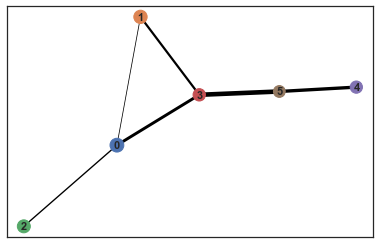

Poincare maps
Qlocal = 0.71, Qglobal = 0.91, Kmax = 14


PCA
Qlocal = 1.00, Qglobal = 0.94, Kmax = 0
tSNE
Qlocal = 0.68, Qglobal = 0.84, Kmax = 16
UMAP
Qlocal = 0.76, Qglobal = 0.80, Kmax = 7
DiffusionMaps
Qlocal = 0.75, Qglobal = 0.91, Kmax = 4
ForceAtlas2
Qlocal = 0.78, Qglobal = 0.90, Kmax = 4


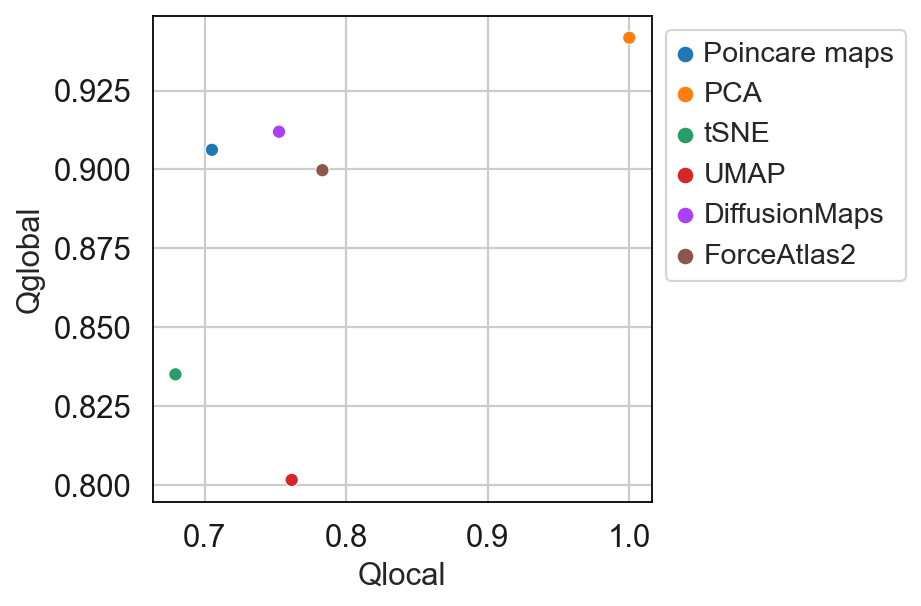

In [5]:
# df_pa = benchmarkQuality('Paul', n_pca=20)

df = benchmarkQuality('ToggleSwitch', k=15)


... storing 'labels' as categorical


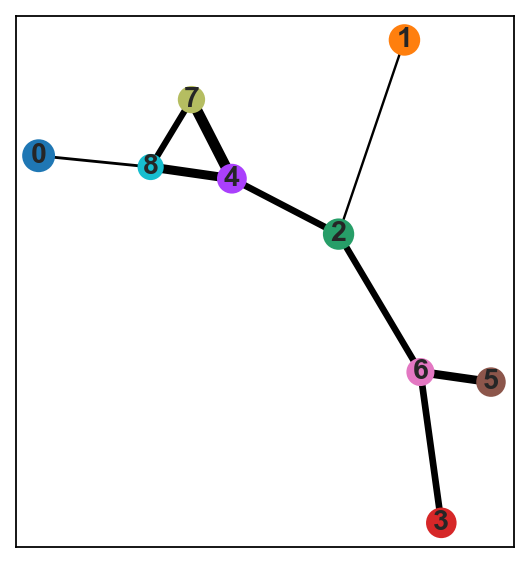

Poincare maps
Qlocal = 0.77, Qglobal = 0.93, Kmax = 42


PCA
Qlocal = 0.73, Qglobal = 0.91, Kmax = 29
tSNE
Qlocal = 0.82, Qglobal = 0.91, Kmax = 10
UMAP
Qlocal = 0.79, Qglobal = 0.78, Kmax = 18
DiffusionMaps
Qlocal = 0.68, Qglobal = 0.89, Kmax = 52
ForceAtlas2
Qlocal = 0.82, Qglobal = 0.93, Kmax = 19


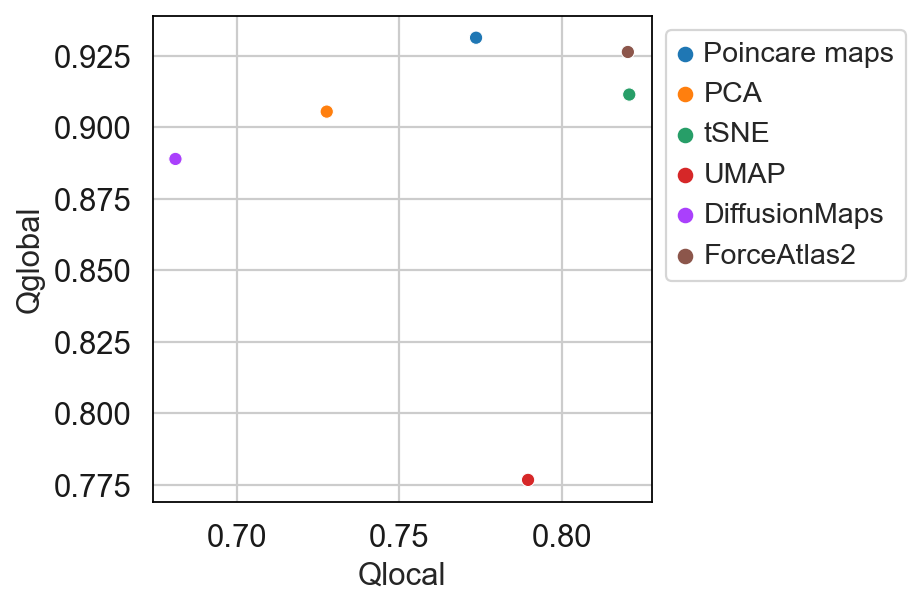

In [6]:
df_mp = benchmarkQuality('MyeloidProgenitors', k=30)


... storing 'labels' as categorical


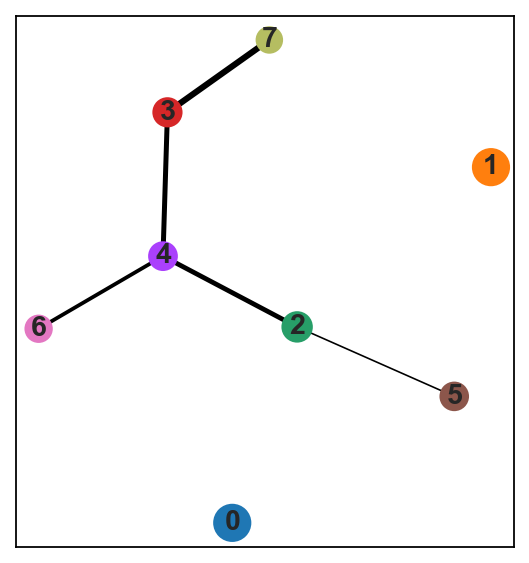

Poincare maps
Connecting 3
Qlocal = 0.77, Qglobal = 0.90, Kmax = 318


PCA
Connecting 3
Qlocal = 0.67, Qglobal = 0.89, Kmax = 318
tSNE
Connecting 3
Qlocal = 0.77, Qglobal = 0.83, Kmax = 317
UMAP
Connecting 3
Qlocal = 0.57, Qglobal = 0.74, Kmax = 82
DiffusionMaps
Connecting 3
Qlocal = 0.41, Qglobal = 0.89, Kmax = 318
ForceAtlas2
Connecting 3
Qlocal = 0.75, Qglobal = 0.83, Kmax = 318


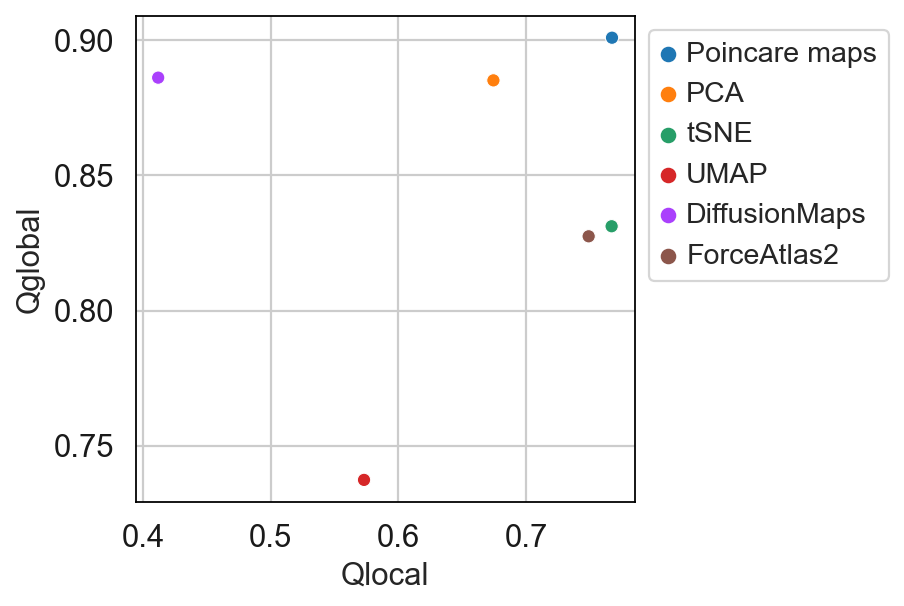

In [7]:
df_kr = benchmarkQuality('krumsiek11_blobs', k=30)

... storing 'labels' as categorical


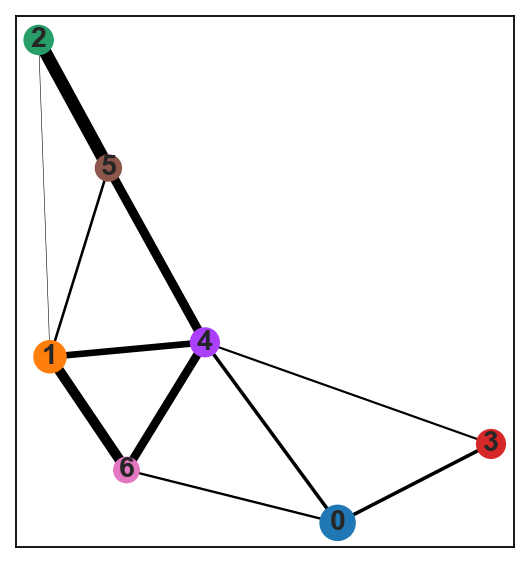

Poincare maps
Qlocal = 0.64, Qglobal = 0.93, Kmax = 37


PCA
Qlocal = 0.57, Qglobal = 0.90, Kmax = 73
tSNE
Qlocal = 0.67, Qglobal = 0.91, Kmax = 55
UMAP
Qlocal = 0.64, Qglobal = 0.89, Kmax = 40
DiffusionMaps
Qlocal = 0.61, Qglobal = 0.89, Kmax = 68
ForceAtlas2
Qlocal = 0.64, Qglobal = 0.92, Kmax = 48


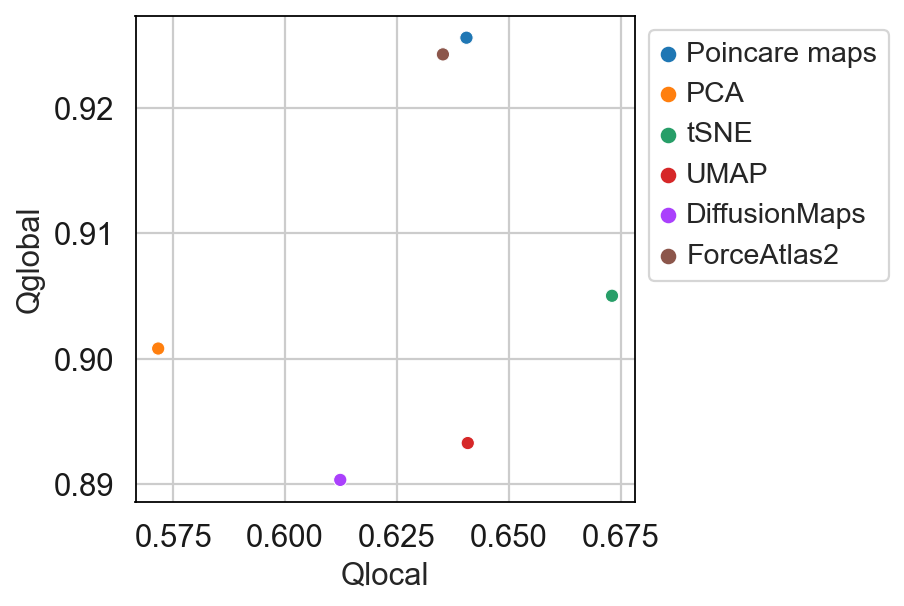

In [8]:
df_ol = benchmarkQuality('Olsson', root_name='HSPC-1', n_pca=20, k=15)


... storing 'labels' as categorical


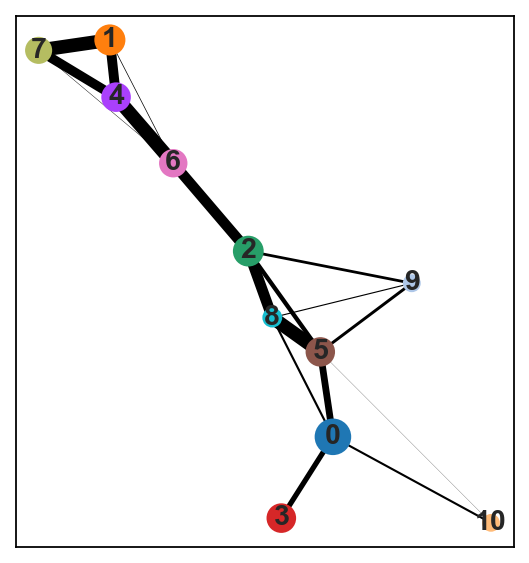

Poincare maps
Qlocal = 0.62, Qglobal = 0.92, Kmax = 422


PCA
Qlocal = 0.57, Qglobal = 0.91, Kmax = 875
tSNE
Qlocal = 0.63, Qglobal = 0.87, Kmax = 472
UMAP
Qlocal = 0.61, Qglobal = 0.90, Kmax = 406
DiffusionMaps
Qlocal = 0.51, Qglobal = 0.90, Kmax = 488
ForceAtlas2
Qlocal = 0.63, Qglobal = 0.92, Kmax = 551


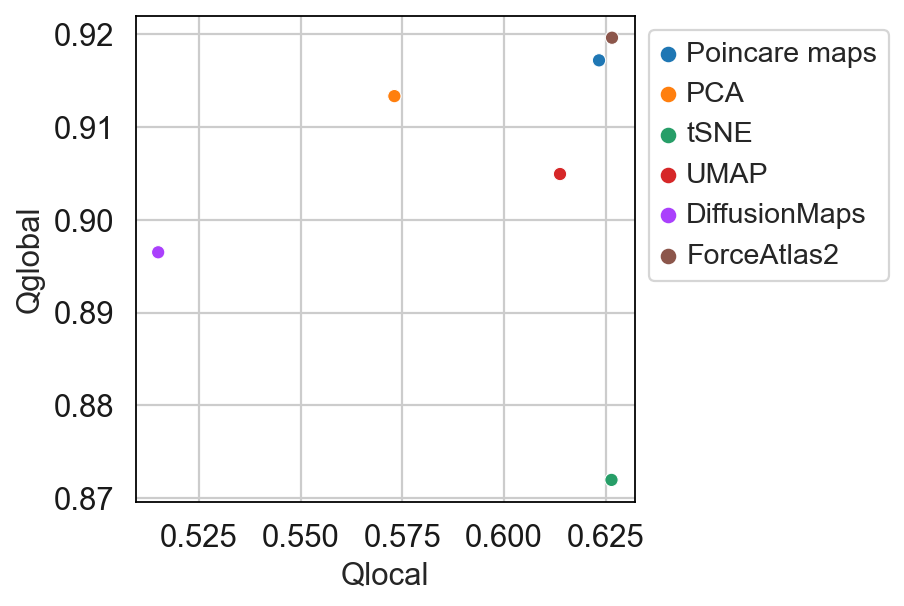

In [9]:
df_pa = benchmarkQuality('Paul', n_pca=20)


In [10]:
# df_pl = benchmarkQuality('Planaria', n_pca=0, root_name='neoblast 1')
